# Hello, notebook!!

Welcome to jupyter (iPython) notebooks. 

## Notebooks
### What is it?
A notebook is an interactive coding session. It is a *recipe book* with instructions for a particular sequence. You can read the notebook and execute code snippets interactively to follow the recipe. You can also tweak the ingredients to make your own, new recipe!

### No really though, what is it?
jupyter notebooks runs a web server that interactively. It displays the contents of a `.ipynb` file, which can be edited dynamically. The server also runs an iPython session which can be used to run python commands. Let's figure out what's in a jupyter notebook file: 

In [1]:
line_count = 0
with open('pandas_walkthru.ipynb') as jupyter_file:
    for line in jupyter_file:
        line_count += 1
        print(line)
        
        if line_count > 30:
            break

{

 "cells": [

  {

   "cell_type": "markdown",

   "metadata": {},

   "source": [

    "# Hello, notebook!!\n",

    "\n",

    "Welcome to jupyter (iPython) notebooks. \n",

    "\n",

    "## Notebooks\n",

    "### What is it?\n",

    "A notebook is an interactive coding session. It is a *recipe book* with instructions for a particular sequence. You can read the notebook and execute code snippets interactively to follow the recipe. You can also tweak the ingredients to make your own, new recipe!\n",

    "\n",

    "### No really though, what is it?\n",

    "jupyter notebooks runs a web server that interactively. It displays the contents of a `.ipynb` file, which can be edited dynamically. The server also runs an iPython session which can be used to run python commands. Let's figure out what's in a jupyter notebook file: "

   ]

  },

  {

   "cell_type": "code",

   "execution_count": null,

   "metadata": {},

   "outputs": [],

   "source": [

    "line_count = 0\n",

    "

Cool! So this file `pandas_walkthru.ipynb` is a `JSON` object, that has markdown and code embedded inside. Everything we type here is automatically saved there and displayed in the web-browser. 

### So, why notebooks?

If it isn't obvious yet, let me explain. Notebooks are neat because you can write notes alongside your code. You can tweak both interactively, then also see the results of your code on-the-fly. Then, you can share your notebook with someone else and they can follow the exact same steps as you. And (hopefully) they will get the same results. 

## Python for automation

### What just happened there?
Let's take a step back and see what we just did. While we were learning about jupyter notebooks we also learned something about python: it's *ridiculously* easy to read files in python. It takes only 3 lines of code:

```python
with open('a_file') as f:
    for line in f:
        do_something_to(line)
```

When we printed the file above I was kind and limited the output to a few lines, so that needed a bit of extra code. The cool thing is, most data is text-based so it's almost never more difficult than this to read a file. 

### Why we choose python 
But this is why we use python. It works like magic and you don't need to spend a lot of time writing code. When you use python you get access to the python community. This group of folks loves collaboration and open-source software, so they give you lots of advice and free code that does cool things. So let's do something cool. 

## Getting new stuff

Most of us need to work with a lot of spreadsheets to do our jobs. Sometimes it's really redious to read a bunch of spreadsheets and extract the data we need. Luckily, python has us  covered here too. We'll need to make sure we have a few tools first. We'll be using a library called `pandas`. We'll need some data, too. Since most of our data is confidential or restricted, we'll be best off using a public data set. 

### Install software using `conda`

If you need a new package, or want to make sure a library is installed, we use the command line tool `conda` that comes with our Anaconda installation. Let's get `pandas`. It's usually best to run `conda update --all` first, but we're running python right now, so we can't. 


In [2]:
!conda install -y pandas

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment C:\ProgramData\Anaconda3:

The following packages will be UPDATED:

    pandas: 0.20.1-np112py36_0 --> 0.20.3-py36_0




CondaIOError: Missing write permissions in: C:\ProgramData\Anaconda3
#
# You don't appear to have the necessary permissions to install packages
# into the install area 'C:\ProgramData\Anaconda3'.
# However you can clone this environment into your home directory and
# then make changes to it.
# This may be done using the command:
#
# $ conda create -n my_root --clone="C:\ProgramData\Anaconda3"




Your output could vary, depending on which versions of things have been installed. Hopefully you saw that pandas came preinstalled. Anaconda comes with most of the basic analysis tools that we might want. If we want to see more info about a particular package:

In [3]:
!conda list pandas

# packages in environment at C:\ProgramData\Anaconda3:
#
pandas                    0.20.3                   py36_0  


In [4]:
!conda info pandas

Fetching package metadata ...........

pandas 0.9.0 np16py27_0
-----------------------
file name   : pandas-0.9.0-np16py27_0.tar.bz2
name        : pandas
version     : 0.9.0
build string: np16py27_0
build number: 0
channel     : defaults
size        : 1.8 MB
arch        : x86_64
date        : 2012-11-08
license     : BSD
md5         : 310e139d06a69a55543432c76310b59f
noarch      : None
platform    : win32
url         : https://repo.continuum.io/pkgs/free/win-64/pandas-0.9.0-np16py27_0.tar.bz2
dependencies:
    dateutil
    numpy 1.6*
    python 2.7*
    scipy

pandas 0.9.1 np16py27_0
-----------------------
file name   : pandas-0.9.1-np16py27_0.tar.bz2
name        : pandas
version     : 0.9.1
build string: np16py27_0
build number: 0
channel     : defaults
size        : 1.9 MB
arch        : x86_64
date        : 2012-11-29
license     : BSD
md5         : bc9573c96acdeee56977ece66a672401
noarch      : None
platform    : win32
url         : https://repo.continuum.io/pkgs/free/win-64/pandas

dependencies:
    numpy 1.9*
    python 3.3*
    python-dateutil
    pytz

pandas 0.16.1 np19py34_0
------------------------
file name   : pandas-0.16.1-np19py34_0.tar.bz2
name        : pandas
version     : 0.16.1
build string: np19py34_0
build number: 0
channel     : defaults
size        : 4.7 MB
arch        : x86_64
date        : 2015-05-11
license     : BSD
md5         : bd3a453f22226ed20397b26bd41a13db
noarch      : None
platform    : win32
url         : https://repo.continuum.io/pkgs/free/win-64/pandas-0.16.1-np19py34_0.tar.bz2
dependencies:
    numpy 1.9*
    python 3.4*
    python-dateutil
    pytz

pandas 0.16.2 np19py26_0
------------------------
file name   : pandas-0.16.2-np19py26_0.tar.bz2
name        : pandas
version     : 0.16.2
build string: np19py26_0
build number: 0
channel     : defaults
size        : 4.6 MB
arch        : x86_64
date        : 2015-06-15
license     : BSD
md5         : 662f97f6e6bc1ba0d01764c79fe5c7db
noarch      : None
platform    : win32
url         

### Install software using pip

`conda` is great for stable, well-defined libraries. It is well curated, so it has only the most common packages. If you want another open-source library, it will usually be found on the PyPI (Python Package Index). This is a public repository hosted by the Python Software Foundation, and anyone can package and submit their code there. To install, we use the tool `pip` ("Pip Installs Packages"). 

We're going to use a website [data.world](https://data.world) that allows users to share interesting data sets. 

In [5]:
!pip install -I datadotworld

  Using cached datadotworld-1.3.0-py2.py3-none-any.whl
  Using cached requests-2.18.2-py2.py3-none-any.whl
  Using cached jsontableschema-0.10.1-py2.py3-none-any.whl
  Using cached click-6.7-py2.py3-none-any.whl
  Using cached urllib3-1.22-py2.py3-none-any.whl
  Using cached datapackage-0.8.9-py2.py3-none-any.whl
  Using cached certifi-2017.7.27.1-py2.py3-none-any.whl
  Using cached python_dateutil-2.6.1-py2.py3-none-any.whl
  Using cached tabulator-1.1.0-py2.py3-none-any.whl
  Using cached six-1.10.0-py2.py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl
  Using cached idna-2.5-py2.py3-none-any.whl
  Using cached rfc3986-0.4.1-py2.py3-none-any.whl
  Using cached jsonschema-2.6.0-py2.py3-none-any.whl
  Using cached jsonlines-1.1.3-py2.py3-none-any.whl
  Using cached xlrd-1.0.0-py3-none-any.whl
  Using cached ijson-2.3-py2.py3-none-any.whl
  Using cached cchardet-1.1.3-cp36-cp36m-win_amd64.whl


Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\commands\install.py", line 342, in run
    prefix=options.prefix_path,
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\req\req_set.py", line 784, in install
    **kwargs
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\req\req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\req\req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\wheel.py", line 323, in clobber
    shutil.copyfile(srcfile, destfile)
  File "C:\ProgramData\Anaconda3\lib\

Awesome. Now we have a module `datadotworld` that we can use to download data. First, we will need to set up an account on (data.world) and get an API access token. 

We will open a command line and run 
```code 

dw configure
```
Then paste our token. Now we should be all set

## Working with pandas

### Download from data.world

In [6]:
import datadotworld as dw

df = dw.load_dataset('mattschroyer/netflix-original-series').dataframes['netflix_originals_series']

This will download the `netflix_originals_series` and load a `pandas.DataFrame` object`

## Load locally

Alternatively, 

if the data is local then you can load it using `pandas.read_excel()`
Original data can be found at https://data.world/mattschroyer/netflix-original-series

In [7]:
ls

 Volume in drive C is OS
 Volume Serial Number is A489-ECA2

 Directory of C:\Users\MSmith393\Documents\Python Scripts\pydt_intro

2017-08-01  11:49    <DIR>          .
2017-08-01  11:49    <DIR>          ..
2017-08-01  11:37    <DIR>          .ipynb_checkpoints
2017-08-01  10:41               165 ~$anaconda_install.pptx
2017-08-01  10:47            35,018 anaconda_install.pptx
2017-08-01  10:41            39,176 netflix_originals_series.xlsx
2017-08-01  11:49           117,632 pandas_walkthru.ipynb
               4 File(s)        191,991 bytes
               3 Dir(s)  373,942,861,824 bytes free


In [8]:
import pandas as pd

df = pd.read_excel('netflix_originals_series.xlsx')

## Manipulating a `DataFrame`

In [9]:
type(df)

pandas.core.frame.DataFrame

A `DataFrame` is tablular data that has named headers. `pandas` provides a smooth interface to view, plot and analyze this data. 

In [10]:
df.head()

,Major_Genre,Title,Subgenre,Premiere Date,Premiere_Year,Seasons,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating
0,Animation,Star Wars: The Clone Wars (season 6),Animation,2014-03-07,2014,"1 season, 13 episodes",Ended,22,22,1,13,80
1,Comedy,Arrested Development (season 4),Comedy,2013-05-26,2013,"1 season, 15 episodes",Renewed,28,37,1,15,89
2,Comedy,Russell Peters vs. the World,Docu-Series,2013-10-03,2013,"1 season, 4 episodes",Ended,26,29,1,4,60
3,Comedy,BoJack Horseman,Adult Animation,2014-08-22,2014,"3 seasons, 36 episodes",Renewed,25,26,3,36,84
4,Comedy,"Trailer Park Boys (seasons 8, 9, 10 and 11)",Mockumentary,2014-09-05,2014,"4 seasons, 40 episodes",Pending,22,32,4,40,85


This printed the first 5 lines of the data. We can also print the last 10:

In [11]:
df.tail(10)

,Major_Genre,Title,Subgenre,Premiere Date,Premiere_Year,Seasons,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating
99,Foreign Language,Ingobernable,Political drama,2017-03-24,2017,"1 season, 15 episodes",Renewed,32,50,1,15,73
100,Foreign Language,Las Chicas del Cable (Cable Girls),Period drama,2017-04-28,2017,"1 season, 8 episodes",Renewed,47,63,1,8,76
101,Marvel,Marvel's Daredevil,Crime drama/legal drama,2015-04-10,2015,"2 seasons, 26 episodes",Renewed,48,59,2,26,87
102,Marvel,Marvel's Jessica Jones,Neo-noir/psychological thriller,2015-11-20,2015,"1 season, 13 episodes",Renewed,46,55,1,13,82
103,Marvel,Marvel's Luke Cage,Neo-blaxploitation,2016-09-30,2016,"1 season, 13 episodes",Renewed,46,65,1,13,77
104,Marvel,Marvel's Iron Fist,Martial arts/mystery fiction,2017-03-17,2017,"1 season, 13 episodes",Pending,50,61,1,13,72
105,Reality,Chasing Cameron,Celebrity,2016-12-27,2016,"1 season, 10 episodes",Pending,26,33,1,10,40
106,Reality,Ultimate Beastmaster[a],Competition,2017-02-24,2017,"1 season, 10 episodes",Renewed,44,60,1,10,73
107,Talk Show,Chelsea,Talk Show,2016-05-11,2016,"1 season, 90 episodes[a]",Ongoing,27,40,1,90,67
108,Talk Show,Bill Nye Saves the World,Talk Show,2017-04-21,2017,"1 season, 13 episodes",Pending,27,32,1,13,33


In [12]:
df.index

RangeIndex(start=0, stop=109, step=1)

In [13]:
df.columns

Index(['Major_Genre', 'Title', 'Subgenre', 'Premiere Date', 'Premiere_Year',
       'Seasons', 'Status', 'Min_Length', 'Max_Length', 'Seasons.1',
       'Episodes', 'IMDB_Rating'],
      dtype='object')

Let's try and sort the data:

In [15]:
df.sort_values(by='Premiere Date', ascending=False)

,Major_Genre,Title,Subgenre,Premiere Date,Premiere_Year,Seasons,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating
39,Docu-Series,The Keepers,Documentary,2017-05-19,2017,"1 season, 7 episodes",Pending,56,66,1,7,84
89,Family Animation,All Hail King Julien: Exiled,Animation,2017-05-12,2017,"1 season, 13 episodes",Pending,23,23,1,13,92
57,Drama,The Last Kingdom (season 2) (co-production wit...,Period drama,2017-05-05,2017,"1 season, 8 episodes",Pending,57,59,1,8,83
88,Family Animation,Spirit Riding Free,Animation,2017-05-05,2017,"1 season, 6 episodes",Pending,23,23,1,6,61
25,Comedy,Dear White People,Satire/Drama,2017-04-28,2017,"1 season, 10 episodes",Pending,21,33,1,10,64
100,Foreign Language,Las Chicas del Cable (Cable Girls),Period drama,2017-04-28,2017,"1 season, 8 episodes",Renewed,47,63,1,8,76
108,Talk Show,Bill Nye Saves the World,Talk Show,2017-04-21,2017,"1 season, 13 episodes",Pending,27,32,1,13,33
24,Comedy,Girlboss,Comedy,2017-04-21,2017,"1 season, 13 episodes",Pending,24,29,1,13,72
38,Docu-Series,Hot Girls Wanted: Turned On,Documentary,2017-04-21,2017,"1 season, 6 episodes",Pending,41,58,1,6,69
23,Comedy,Mystery Science Theater 3000: The Return,Comic science fiction,2017-04-14,2017,"1 season, 14 episodes",Pending,86,94,1,14,86


### Querying

`pandas` Supports high-level manipulation with a SQL-like syntax. This makes aggregation pretty easy. 

In [16]:
df_by_year = df.groupby('Premiere_Year').count()
df_by_year

,Major_Genre,Title,Subgenre,Premiere Date,Seasons,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating
Premiere_Year,,,,,,,,,,,
2013,7,7,7,7,7,7,7,7,7,7,7
2014,7,7,7,7,7,7,7,7,7,7,7
2015,24,24,24,24,24,23,24,24,24,24,24
2016,45,45,45,45,45,43,45,45,45,45,45
2017,26,26,26,26,26,26,26,26,26,26,26


In [17]:
df.groupby(['Major_Genre', 'Subgenre']).size()

Major_Genre         Subgenre                        
Animation           Animation                            1
Comedy              Adult Animation                      1
                    Comedy                               7
                    Comedy-drama                         2
                    Comedy-horror                        1
                    Comic science fiction                1
                    Docu-Series                          1
                    Mockumentary                         2
                    Romantic comedy                      1
                    Romantic comedy anthology series     1
                    Satire/Drama                         1
                    Satirical comedy                     1
                    Sitcom                               4
                    Sketch comedy                        2
Docu-Series         Comedy                               1
                    Crime drama                          1
   

### Plotting 

Or maybe we want a histogram?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211AC6DFCC0>]], dtype=object)

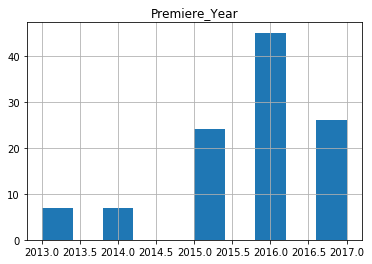

In [18]:
%matplotlib inline 
df.hist(column='Premiere_Year')

Exporting to CSV is also a breeze:

In [21]:
df.to_csv('my_csv.csv')

In [22]:
ls

 Volume in drive C is OS
 Volume Serial Number is A489-ECA2

 Directory of C:\Users\MSmith393\Documents\Python Scripts\pydt_intro

2017-08-01  12:03    <DIR>          .
2017-08-01  12:03    <DIR>          ..
2017-08-01  11:37    <DIR>          .ipynb_checkpoints
2017-08-01  10:41               165 ~$anaconda_install.pptx
2017-08-01  10:47            35,018 anaconda_install.pptx
2017-08-01  12:03            11,973 my_csv.csv
2017-08-01  10:41            39,176 netflix_originals_series.xlsx
2017-08-01  12:03           200,666 pandas_walkthru.ipynb
               5 File(s)        286,998 bytes
               3 Dir(s)  373,938,532,352 bytes free


## More information

This tutorial is an extremely basic overview of the kinds of things you can do in python. For more information about using pandas to read and write tabular data, check out [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html). In order to work with your own data you will need to get down into the weeds, but you will be able to write a script that can be replayed over and over again. Who knows how much time you will save? 